### 1. Introduction and problem statement

The main objectives of the project are followings:

* To apply data preprocessing and preparation techniques in order to obtain clean data.
* To build machine learning models to predict house price base on the house features
* To analyse and compare models performance and choose the best model

Modelling algorithm is used to build an optimise predictive model to predict the housing price. RMSLE and coefficient determination R2 are used to evaluate the model. Ridge, Lasso and Linear regression will be used for regularize the model.

Most of  the variables are  exactly  the type  of information that a  typical home  buyer would want to know about a potential property (  (e.g. When was it  built?  How  big  is the  lot?  How  many  square feet of living  space  is in the dwelling?  Is the basement finished?  How  many  bathrooms  are there?).

The model is expected to be used to help a home buyer (primary stakeholder) to  obtain the proper price by adjust their bid price accordingly. Also, property owners (Secondary stakeholder) may find the model useful to post a reasonable sale price of their home in the property market.

### 2. Data description

We will use a housing dataset presented by De Cock (2011) which describe the sale  of  individual residential property  in Ames,  Iowa from 2006 to 2010. The  data set contains 2919 observations and 80 explanatory variables (23 nominal, 23  ordinal, 14 discrete,  and  20 continuous) involved in assessing  home values. Since the number of featuresis large (81), we will attach the orginal data description file to this project for more information.

##### A detailed description of the data types for each columns by Dean De Cock [Source](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

#### Importing libraries and data

In [263]:
# import libraries

import numpy as np
import pandas as pd

# visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
# read csv files

train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')


#### Getting a feel of the dataset

In [265]:
train.shape

(2051, 81)

In [266]:
# Show all data columns.
pd.set_option("display.max_columns", 100)

pd.options.display.float_format = '{:20.2f}'.format
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.00,Gd,TA,CBlock,TA,TA,No,GLQ,533.00,Unf,0.00,192.00,725.00,GasA,Ex,Y,SBrkr,725,754,0,1479,0.00,0.00,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.00,RFn,2.00,475.00,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.00,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.00,Gd,TA,PConc,Gd,TA,No,GLQ,637.00,Unf,0.00,276.00,913.00,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.00,0.00,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.00,RFn,2.00,559.00,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.00,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,Gd,CBlock,TA,TA,No,GLQ,731.00,Unf,0.00,326.00,1057.00,GasA,TA,Y,SBrkr,1057,0,0,1057,1.00,0.00,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.00,Unf,1.00,246.00,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.00,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0.00,Unf,0.00,384.00,384.00,GasA,Gd,Y,SBrkr,744,700,0,1444,0.00,0.00,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.00,Fin,2.00,400.00,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.00,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.00,TA,TA,PConc,Fa,Gd,No,Unf,0.00,Unf,0.00,676.00,676.00,GasA,TA,Y,SBrkr,831,614,0,1445,0.00,0.00,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.00,Unf,2.00,484.00,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [267]:
# see the statistical information about the numeric columns in the dataset

train.describe(include=[np.number], percentiles=[.5]).transpose().drop("count", axis=1)


,mean,std,min,50%,max
Id,1474.03,843.98,1.00,1486.00,2930.00
PID,713590006.09,188691837.89,526301100.00,535453200.00,924152030.00
MS SubClass,57.01,42.82,20.00,50.00,190.00
Lot Frontage,69.06,23.26,21.00,68.00,313.00
Lot Area,10065.21,6742.49,1300.00,9430.00,159000.00
Overall Qual,6.11,1.43,1.00,6.00,10.00
Overall Cond,5.56,1.10,1.00,5.00,9.00
Year Built,1971.71,30.18,1872.00,1974.00,2010.00
Year Remod/Add,1984.19,21.04,1950.00,1993.00,2010.00
Mas Vnr Area,99.70,174.96,0.00,0.00,1600.00


From the result above, the average lot area of the houses in our dataset is 10065.21 ft2 with a standard deviation of 6742.49 ft2. Also, the minimum lot area is 1,300 ft2 and the maximum lot area is 159,000 ft2 with a median of 9430 ft2.

In [268]:
# Also, we can see the statistical information about the categorical columns
# 'count' represent the non-null number for each columns

train.describe(include=[np.object]).transpose().drop("count", axis=1)

<ipython-input-268-51ec1bdb235d>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train.describe(include=[np.object]).transpose().drop("count", axis=1)


,unique,top,freq
MS Zoning,7,RL,1598
Street,2,Pave,2044
Alley,2,Grvl,85
Lot Shape,4,Reg,1295
Land Contour,4,Lvl,1843
Utilities,3,AllPub,2049
Lot Config,5,Inside,1503
Land Slope,3,Gtl,1953
Neighborhood,28,NAmes,310
Condition 1,9,Norm,1767


From the table above, the unique represents the number of unqiue values while the top represent the elements with most frequent count.

### 3. Cleaning data

#### 3a. Rename the columns

In [269]:
# convert all string in cells to lowercase

train = train.applymap(lambda s:s.lower() if type(s) == str else s)
test = test.applymap(lambda s:s.lower() if type(s) == str else s)

In [270]:
# convert all columns to lowercase

train.columns= train.columns.str.lower()
test.columns= test.columns.str.lower()

In [271]:
# replace the space with underscore for all columns name

train.columns = train.columns.str.replace(' ','_')
test.columns = test.columns.str.replace(' ','_')

#### 3b. Dealing with Missing Values

In [272]:
# Getting the number of missing values in each column

num_missing = train.isna().sum()

# Excluding columns that contains 0 missing values

num_missing = num_missing[num_missing > 0]

# Getting the percentages of missing values

percent_missing = num_missing * 100 / train.shape[0]

# Concatenating the number and perecentage of missing values into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1,keys=['Missing Values', 'Percentage']).sort_values(by="Missing Values", ascending=False)


,Missing Values,Percentage
pool_qc,2042,99.56
misc_feature,1986,96.83
alley,1911,93.17
fence,1651,80.50
fireplace_qu,1000,48.76
lot_frontage,330,16.09
garage_yr_blt,114,5.56
garage_cond,114,5.56
garage_qual,114,5.56
garage_finish,114,5.56


#### Looking into the features with high null values:

#### Pool QC

* Pool QC is an ordinal variable which measure pool quality from Excellant to NA (No Pool). With the null value of 99.56% , it's probably that most of the house in Ames has no pools. To verify this, we look at the values of `Pool Area` column:

In [273]:
train["pool_area"].value_counts()

0      2042
228       1
368       1
480       1
576       1
648       1
738       1
800       1
519       1
561       1
Name: pool_area, dtype: int64

Since there is 2042 entries with value of 0 in `Pool Area` same with the `Pool QC`, this prove that our hypothesis of house without a pool has a missing value in `Pool QC` is correct. We will impute “None" in the later part of cleaning the missing value for this.

#### Misc Feature

* Misc Feature is an nominal variable which cover the Miscellaneous facilities including Elevator,2nd Garage, Shed (over 100 SF),Tennis Court, other and None. This is seems abnormal due to there are only 56 Shed, 4 2nd Garden, 3 Others, 1 Elevator and 1 Tennis court over the 2051 properties in the list.

In [274]:
train['misc_feature'].value_counts()

shed    56
gar2     4
othr     3
elev     1
tenc     1
Name: misc_feature, dtype: int64

In [275]:
# To check the similiar item `Misc Val` column:

train["misc_val"].value_counts()

0        1986
400        12
500         8
600         6
2000        5
450         5
700         4
4500        2
2500        2
3000        2
1200        2
6500        1
900         1
1500        1
455         1
1300        1
1150        1
650         1
800         1
54          1
17000       1
480         1
460         1
300         1
12500       1
8300        1
80          1
3500        1
Name: misc_val, dtype: int64

We can see that the `Misc Val` columns has the same null number of 1986 with `Misc Feature`. Hence, we will impute the "None" for the missing value of `Misc Feature` later.

#### Alley,Fence and Fireplace Qu

* Alley is a nominal variables which categories the type of alley access to property: Gravel, Paved and No alley access. High in reasonable due to only 7.33 miles of alleys that is for residential or commercial properties in the City of Ames. [Source](https://www.cityofames.org/government/departments-divisions-i-z/public-works/alley-maintenance)

* Fence is an ordinal variable which covers the fence quality from Good Privacy,Minimum Privacy,Good Wood,Minimum Wood/Wire and No Fence. It is reasonable with 1911 null values for the variable due to Ames is urban area.

* Fireplace Qu is an ordinal variable evaluate the fireplace quality of the property ranging from excellent to no fireplace. Null value of 1000 represented about 48% of the observations is considered acceptable due to not all the properties have fireplace in Ames.

We will fill "None" for these columns in later part base on the justification above.

#### Lot Frontage

* Lot Frontage is a continuos variable measuring Linear feet of street connected to property. All properties should have some level of steet frontage, meaning that the 16.09% null values are likely areas. Hence, we will impute the mean to the null values later.

#### Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt, Garage Type, Garage Cars, and Garage Area

* The garage variables (Garage Yr Blt,Garage Cond,Garage Qual,Garage Finish and Garage Type) are nominal, ordinal and discrete variable measuring the location, size, capabilty, quality and conditions of garages. The null value is consistent and about 5% in the observations. According to the dataset documentation, NA in Garage Cond, Garage Qual, Garage Finish, and Garage Type indicates that there is no garage in the house. So we will impute "None" to the missing value. However, we notice that Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt columns have 114 missing values, but Garage Type has 113 missing value.

In [276]:
# to see the row of null value for Garage Type

garage_columns = [col for col in train.columns if col.startswith("garage")]
train[~pd.isna(train['garage_type']) & pd.isna(train['garage_qual'])][garage_columns]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,detchd,NaN,NaN,NaN,NaN,NaN,NaN


It seems the input in `garage_type` not accurate with all Null value in the rest of garage variables. Hence we will replace the 'detchd' as 'No Garage' in this case.

In [277]:
# Other than the above, garage_area and garage_car shows 1 null missing value each, let's check the row

train[train['garage_cars'].isna()][garage_columns]


,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,detchd,NaN,NaN,NaN,NaN,NaN,NaN


We will impute '0' to `garage_area` and `garage_car` due to these are numerical columns.

#### Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond, Bsmt Half Bath,Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1

* Base on the dataset documentation, NA in Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, Bsmt Cond columns indicates that there is no basement in the house. Thus, we fill in the missing values in these columns with "None" for those 55 null values. However, the variables `bsmt_exposure` and `bsmtfin_type_2` contain extra 3 and 1 null values respectively compared to other categorical basement variables. 

In [278]:
# Let's us check the extra 3 rows of bsmt_exposure

bsmt_columns = [col for col in train.columns if "bsmt" in col]

train[~pd.isna(train['bsmt_cond']) & pd.isna(train['bsmt_exposure'])][bsmt_columns]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1456,gd,ta,NaN,unf,0.00,unf,0.00,725.00,725.00,0.00,0.00
1547,gd,ta,NaN,unf,0.00,unf,0.00,1595.00,1595.00,0.00,0.00
1997,gd,ta,NaN,unf,0.00,unf,0.00,936.00,936.00,0.00,0.00


We will fill in the missing values in Bsmt Exposure for these three rows with "No". According to the dataset documentation, "No" for Bsmt Exposure means “No Exposure”.

In [279]:
# Let's us check the extra 1 null values of bsmtfin_type_2

train[~pd.isna(train['bsmt_cond']) & pd.isna(train['bsmtfin_type_2'])][bsmt_columns]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1147,gd,ta,no,glq,1124.00,NaN,479.00,1603.00,3206.00,1.00,0.00


We will fill in the missing values in bsmtfin_type_2 for the row with "Unf". According to the dataset documentation, "Unf" for bsmtfin_type_2 means “unfinished”.

* Also on the numerical variables sides, Bsmt Half Bath,Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1 are also null with the same row with variables of the categorical basements variabels, we will impute  '0' to these null value accordingly. However, the variables `bsmt_half_bath` and `bsmt_full_bath` have extra 1 null value each compared to other numerical basement varibles.

In [280]:
# Let's us check the extra 1 null values of bsmt_half_bath and bsmt_full_bath

bsmt_columns = [col for col in train.columns if "bsmt" in col]
train[train['bsmt_half_bath'].isna()][bsmt_columns]


,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that these are the same rows that contain the missing values in Bsmt Full Bath and Bsmt Half Bath ,and that one of these two rows is contains the missing value in each of Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1 columns. We notice also that Bsmt Exposure, BsmtFin Type 2, BsmtFin Type 1, Bsmt Qual, and Bsmt Cond are null in these rows, so we will fill the missing values in Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF, Bsmt Unf SF, BsmtFin SF 2, and BsmtFin SF 1 columns with 0.

#### Mas Vnr Area and Mas Vnr Type 

*  Mas Vnr Type and Mas Vnr Area are nominal and continous variable measuring masonry veneer type and area. Each of these two columns have 23 missing values. Wewill fill in these missing values with "None" for Mas Vnr Type and with 0 for Mas Vnr Area. We use "None" for Mas Vnr Type because in the dataset documentation, "None" for Mas Vnr Type means “None” (i.e. no masonry veneer)

#### Cleaning Null values:

#### Handling null values for numerical variables

In [281]:
# Checking the numerical of nulls variables
num_null = train.loc[:,train.isnull().sum()>0].select_dtypes("number")
list(num_null)

['lot_frontage',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'garage_yr_blt',
 'garage_cars',
 'garage_area']

In [282]:
# fill numerical null values with '0', except for 'garage_yr_blt' and 'lot_frontage'
# treatment for garage_area imputed with '0' due to only 1 line with null consistently appear null with the other garage group variables

## cols = ['mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_cars','garage_area']

for col in num_null:
    train[col] = train[col].fillna(value=0)
    test[col] = test[col].fillna(value=0)

#### Lot Frontage



C:\Users\rimay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rimay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


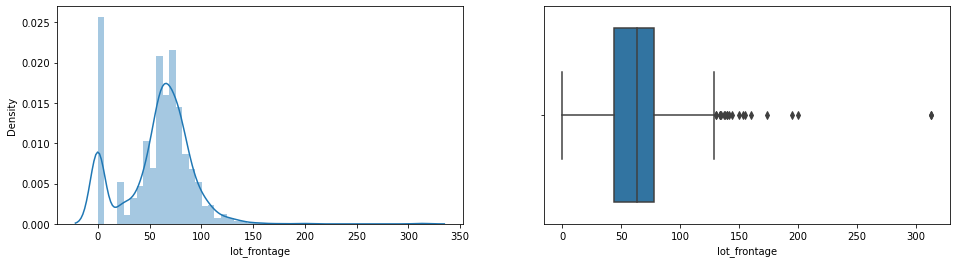

In [283]:
# Exploration of Lot Frontage Variables

target = train.lot_frontage

fig, ax =plt.subplots(1,2, figsize=(16,4))
sns.distplot(target, ax=ax[0])
sns.boxplot(target, ax=ax[1]);

The distribution of the variable is left skew and there are outlier on the both low and high end of Lot Frontage value range. Neighborhood variable may influence Lot Frontage value due to different parts of the city may have different standard for 
LotFrontage.


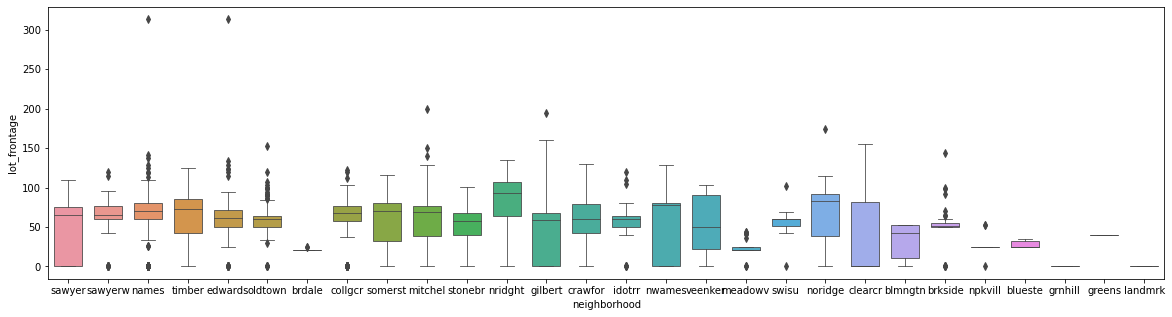

In [284]:
# Neighborhood vs. LotFrontage

plt.figure(figsize=(20,5))
sns.boxplot(x=train['neighborhood'], y=train['lot_frontage'], width=0.7, linewidth=0.8);

From the boxplot above, there are some areas in the city of Ames that have outlier for LotFrontage values while some neighbourhoods have a wider range of lot frontage. However, most of the lot frontage of the areas are close to the medians overall. Hence, suggest that we impute the null value of lot frontage base on the estimated median lot frontage of neighborhood of the city below.

In [285]:
# Function to estimate lot frontage based on average of houses in neighborhood of the city

def lot_frontage_gen(row):
    if np.isnan(row['lot_frontage']):
        neighborhood = row['neighborhood']
        nbrhd_std = train[train['neighborhood'] == neighborhood]['lot_frontage'].std()
        lot_frontage_mean = train[train['neighborhood'] == neighborhood]['lot_frontage'].mean()
        
        try:
            # Add in slight randomness to prevent understimation of variance
            row['lot_frontage'] = lot_frontage_mean + np.random.randint(-nbrhd_std, nbrhd_std) / 1.25
        
        # If neighborhood is NAN
        except:
            pid = str(row['pid'])
            print(pid, '-- Neighborhood N/A -- imputing township average')
            sliced_pid = pid[0:3]
            lot_frontage_mean = train[train['pid'].astype(str).str.contains(sliced_pid)]['lot_frontage'].mean()
            row['lot_frontage'] = lot_frontage_mean
            
    return row

In [286]:
train = train.apply(lot_frontage_gen, axis=1)
test = test.apply(lot_frontage_gen, axis=1)

#### Handling null values for categorical variables

In [287]:
# Checking the categories of nulls variables

cat_null = train.loc[:,train.isnull().sum()>0].select_dtypes(object)
list(cat_null)

['alley',
 'mas_vnr_type',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [288]:
# impute 'None' for categorical variables

col = ['alley','mas_vnr_type','bsmt_qual','bsmt_cond','bsmtfin_type_1','fireplace_qu','garage_finish','garage_qual','garage_cond','pool_qc','fence','misc_feature']

for col in col:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [289]:
# Fill 'No Garage' for null value in garage_type

train.loc[~pd.isna(train['garage_qual']) & pd.isna(train['garage_type']), "garage_type"] = "no garage"
test.loc[~pd.isna(test['garage_qual']) & pd.isna(test['garage_type']), "garage_type"] = "no garage"

In [290]:
# Fill 'No' for null value in bsmt_exposure

train.loc[~pd.isna(train['bsmt_cond']) & pd.isna(train['bsmt_exposure']), "bsmt_exposure"] = "no"
test.loc[~pd.isna(test['bsmt_cond']) & pd.isna(test['bsmt_exposure']), "bsmt_exposure"] = "no"

In [291]:
# Fill 'Unf' for null value in BsmtFin Type 2

train.loc[~pd.isna(train['bsmt_cond']) & pd.isna(train['bsmtfin_type_2']), "bsmtfin_type_2"] = "unf"
test.loc[~pd.isna(test['bsmt_cond']) & pd.isna(test['bsmtfin_type_2']), "bsmtfin_type_2"] = "unf"

In [292]:
# Final Check for nulls in columns

null_cols = train.isnull().sum()
mask_null = null_cols > 0
null_list = null_cols[mask_null].sort_values(ascending=False)
null_list

Series([], dtype: int64)

### 3c. Checking and cleaning outliers

The documentation for the Ames housing dataset highlights that there are a few number of outliers within the data and suggested to clear these outlier. He suggested to plot the SalePrice against the Gr Liv Area to check the outliers.

#### Gr Liv Area

In [293]:
def create_scatterplot(title,data,x,y,hue=None,xlabel=None,ylabel=None,size=None):    
        
    plt.figure(figsize=(20,12))
    
    sns.set_style("whitegrid")
    palette = sns.color_palette("bright",n_colors=16)
      
    #sns.regplot(data,x=x,y=y)        
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette=palette,size=size,sizes=(10, 200))

    #plt.xlim(min_x,max_x)
    #plt.ylim(min_x,max_x)
                    
    plt.title(title,fontsize=25)
    
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.tick_params(labelsize=15)

Visualisation of outlier of Ground Total Area vs Sale Price


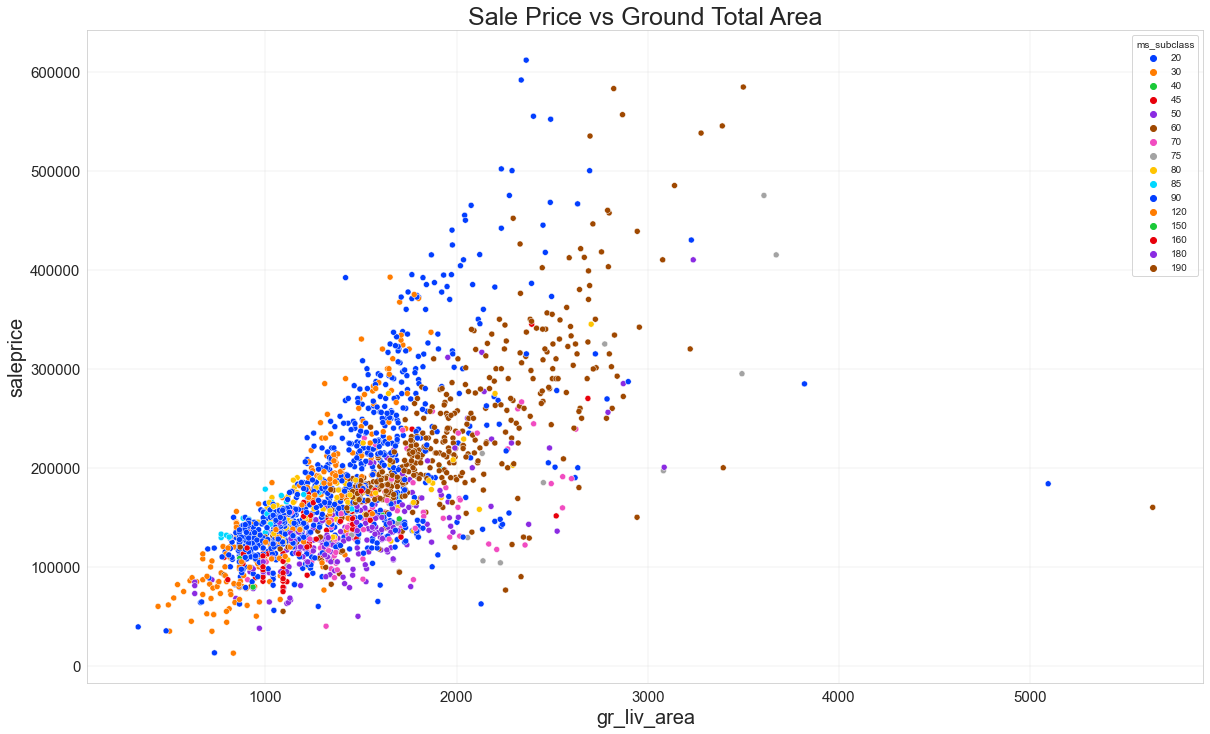

In [294]:
create_scatterplot('Sale Price vs Ground Total Area',train,x='gr_liv_area',y='saleprice',hue='ms_subclass')

print('Visualisation of outlier of Ground Total Area vs Sale Price')

Surprisingly, the outliers > 4000 of scatterplot above shows that low sales price in relation to their square footage. We'll drop these values in order to improve the accuracy of our model.

In [295]:
# Drop outliers of Gr Liv Area

train.drop(train[train['gr_liv_area'] > 4000].index, inplace=True);
test.drop(test[test['gr_liv_area'] > 4000].index, inplace=True);

####  Garage Yr Blt 

Visualisation of outlier of Garage Yr Blt vs Sale Price


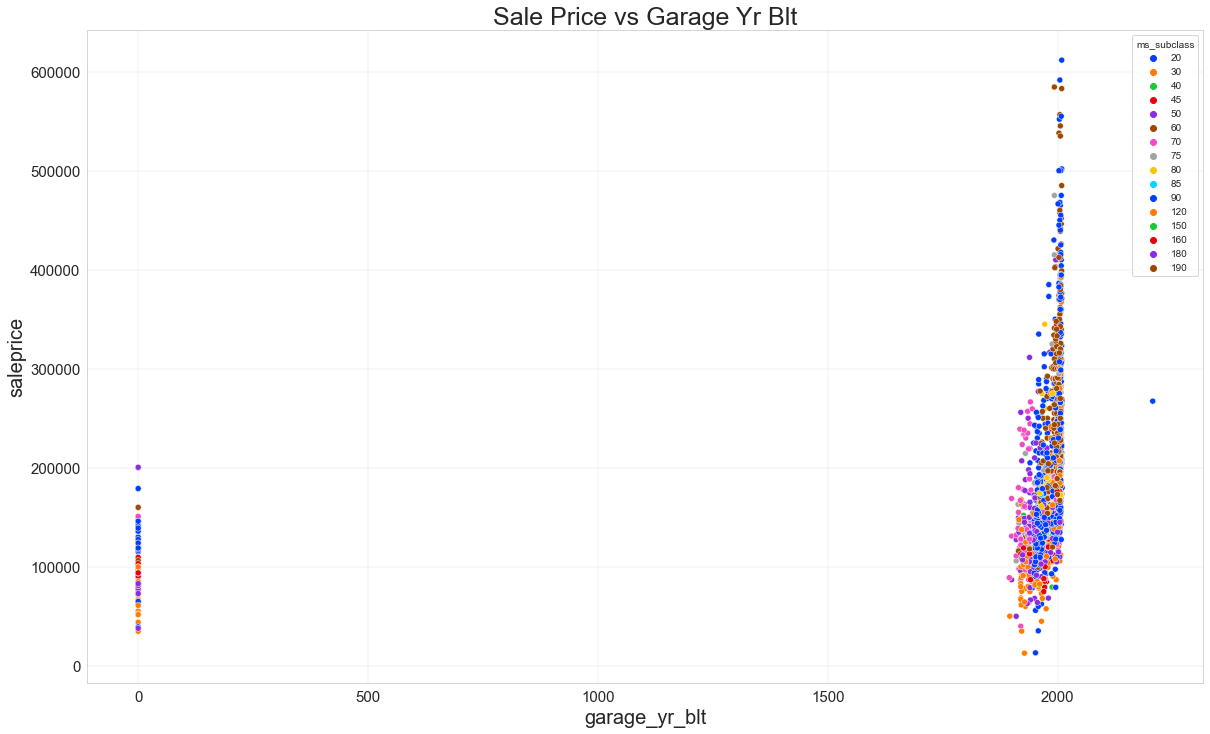

In [296]:
create_scatterplot('Sale Price vs Garage Yr Blt',train,x='garage_yr_blt',y='saleprice',hue='ms_subclass')

print('Visualisation of outlier of Garage Yr Blt vs Sale Price')

An error of the outlier for garage year built. The year should be 2007 instead of 2207.

In [297]:
# correction of the outlier due to error

train['garage_yr_blt'].replace({2207: 2007}, inplace=True)

### 3d Deleting Some Unimportant Columns

In [298]:
# To delete 'id' and 'pid' which is not useful in our analysis

train.drop(['id', 'pid'], axis=1, inplace=True)
test.drop(['id', 'pid'], axis=1, inplace=True)

### 4. Exploratory Data Analysis (EDA)

#### 4a. Target Variable Distribution

C:\Users\rimay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Saleprice')

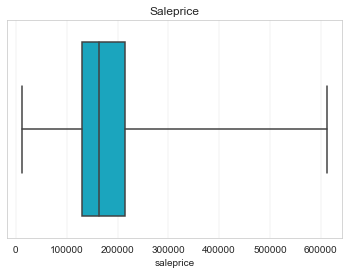

In [299]:
# to visualise the spread of the sale price

sns.boxplot(train['saleprice'], whis=10, color="#00B8D9")
plt.title("Saleprice")

This shows us the minimum and maximum values of SalePrice which the spread from 0 to 600000. It also show the three quartiles represented by the box and verticleline inside of it.

C:\Users\rimay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saleprice')

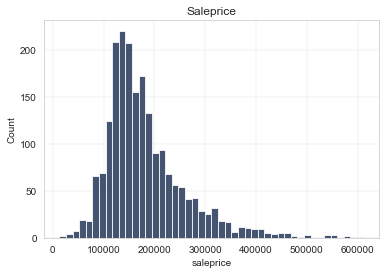

In [300]:
# To visualise the sale price using histogram

sns.distplot(train['saleprice'], kde=False,color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");
plt.title("Saleprice")

The sale price tends to have left skew distribution. Most house prices fall between 100,000 and 200,000 and there is a number of expensive houses to the right of the plot.

#### 4b. Correlation Between Variables

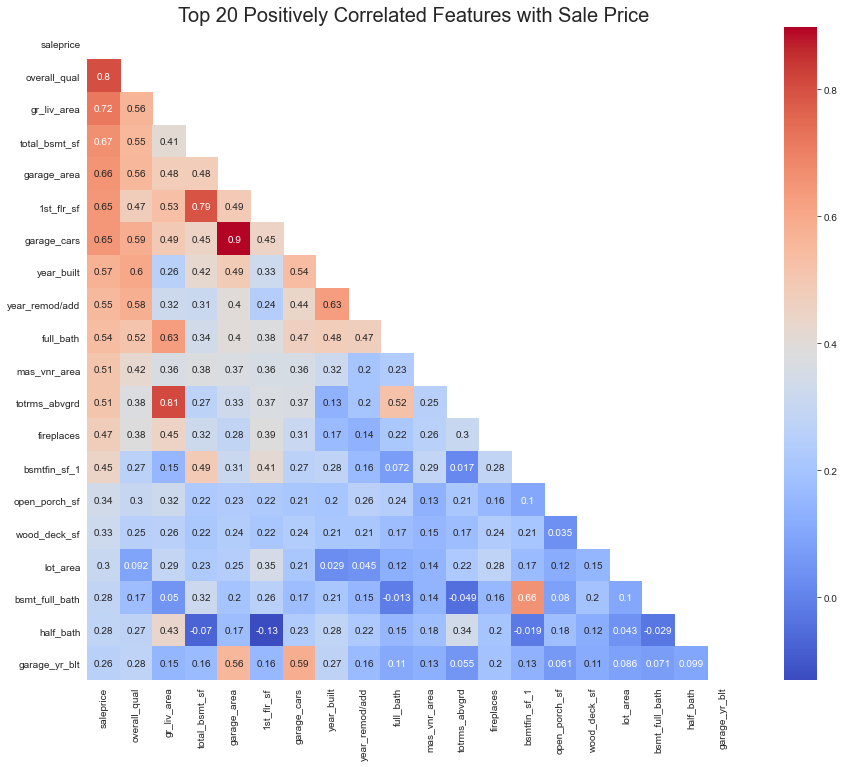

In [301]:
# visualise the top 20 positive correlation between the variables using a heatmap graph

# Create mask for our top twenty positively correlated features
top_corr = train.corr()['saleprice'].sort_values(ascending=False).head(20).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(train[top_corr].corr(), dtype=bool))
ax = sns.heatmap(train[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True)
plt.title('Top 20 Positively Correlated Features with Sale Price', fontsize=20);

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

The heatmap shows that `garage_cars` have high positive correlation with `garage_area` which is considered reasonable as when the garage area increases, the car capacity increase as well. Another sign that `totrms_abvgrd` highly positive correlated with `gr_liv_area` which also is considered make sense as when living area above groud increases, the rooms above ground to increase also. Also the same explanation for the pair of variables of `1st_flr_sf` and the `total_bsmt_sf`.

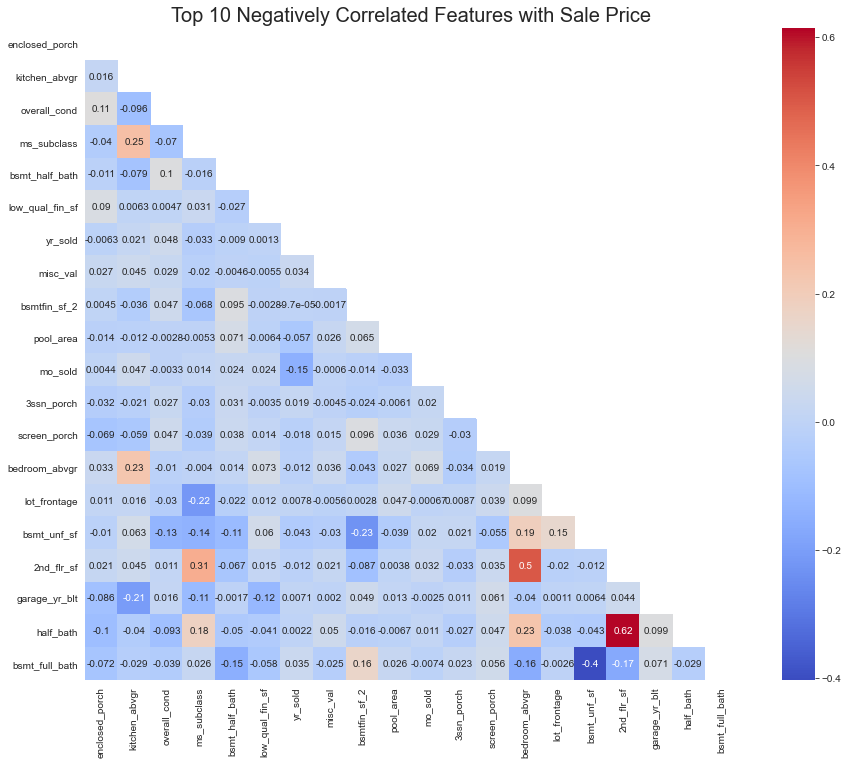

In [302]:
# visualise the top 20 negative correlation between the variables using a heatmap graph

# Create mask for our top twenty positively correlated features
top_corr = train.corr()['saleprice'].sort_values(ascending=True).head(20).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(16,12))
mask = np.triu(np.ones_like(train[top_corr].corr(), dtype=bool))
ax = sns.heatmap(train[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True)
plt.title('Top 10 Negatively Correlated Features with Sale Price', fontsize=20);

#### 4c. Positive relatioships Between the Target Variable and Other Varibles

In [303]:
# Top 20 most postively correlated features

df_corr = train.corr()
print(df_corr.shape)
df_corr['saleprice'].sort_values(ascending=False).head(21)

## excluding sale price

(37, 37)


saleprice                        1.00
overall_qual                     0.80
gr_liv_area                      0.72
total_bsmt_sf                    0.67
garage_area                      0.66
1st_flr_sf                       0.65
garage_cars                      0.65
year_built                       0.57
year_remod/add                   0.55
full_bath                        0.54
mas_vnr_area                     0.51
totrms_abvgrd                    0.51
fireplaces                       0.47
bsmtfin_sf_1                     0.45
open_porch_sf                    0.34
wood_deck_sf                     0.33
lot_area                         0.30
bsmt_full_bath                   0.28
half_bath                        0.28
garage_yr_blt                    0.26
2nd_flr_sf                       0.25
Name: saleprice, dtype: float64

The most important is the relationship between the target variables and the other variables. By looking at the heatmap, we found that the `saleprice` is highly positively correlated with `overall_qual` and `gr_liv_area`. Also the `saleprice` postively correlated with  `total_bsmt_sf`,`garage_area`,`garage_cars`,`1st_flr_sf` etc.

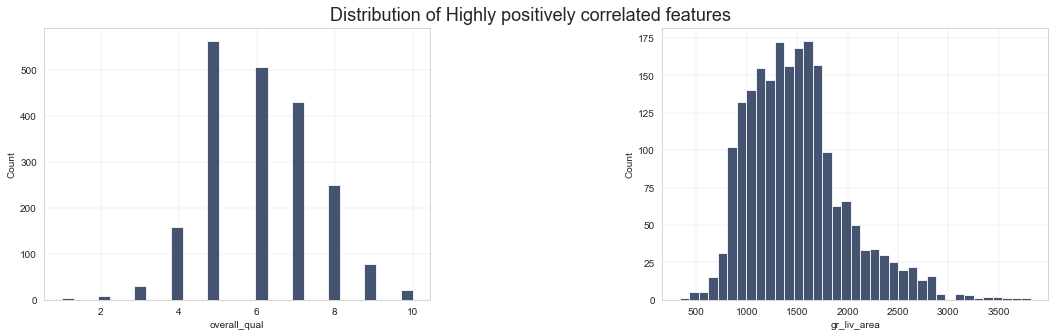

In [304]:
# Let's see the distribution of the highly positively correlated variables: overall_qual and Gr Liv Area

fig, axes = plt.subplots(1, 2, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
fig.suptitle('Distribution of Highly positively correlated features', fontsize=18, y=0.94)
for ax, v in zip(axes.flat, ['overall_qual', 'gr_liv_area']):
    sns.distplot(train[v], kde=False, color="#172B4D",hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

The overall quality show most of the houses have overall quality between 5 to 7 which represent average to good quality. Also, the above ground living area mostly have the 800 to 1800 ft2.

In [305]:
# Custom function for plotting of numeric features
def eda_scatterplot(dataframe, list_of_columns, target):    
    nrows = int(np.ceil(len(list_of_columns)/4))
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*2.5))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        g = sns.regplot(data=dataframe, x=column, y=target, ax=ax[i], ci=None, color='skyblue', line_kws={'color': 'blue'})
        ax[i].set_title(column, fontsize=14)
        ax[i].set_xlabel('')
        plt.tight_layout()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Scatterplot of Numeric Features vs Sale Price', fontsize=18, y=1.2)

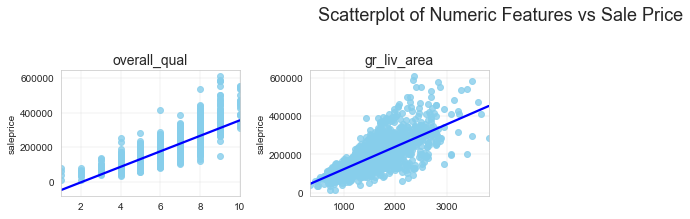

In [306]:
# To visualise the relationship of saleprice vs the overall quality and ground living area

x_var = ['overall_qual', 'gr_liv_area']

eda_scatterplot(train, x_var, 'saleprice')

C:\Users\rimay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


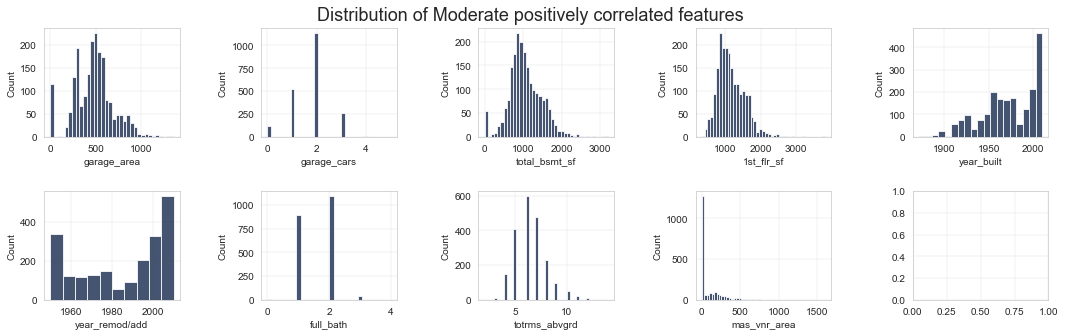

In [307]:
# Let's see the distribution of the moderate positively correlated variables:
# Year Built, Year Remod/Add, Mas Vnr Area, Total Bsmt SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area etc which > 0.5

fig, axes = plt.subplots(2, 5, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
fig.suptitle('Distribution of Moderate positively correlated features', fontsize=18, y=0.94)
for ax, v in zip(axes.flat, ["garage_area", "garage_cars","total_bsmt_sf", "1st_flr_sf","year_built","year_remod/add","full_bath","totrms_abvgrd","mas_vnr_area"]):
    sns.distplot(train[v], kde=False, color="#172B4D",hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

By looking at the distributions of our features, we  found that `Year Built` and `Year Remod/Add`are significantly right-skewed and  `total_bsmt_sf` and `1st_flr_sf` features tend to left skewed.

We can also see that some features have high pick for 0 which could be explained that these criterion not met in the observations. For example, some properties are not attached with garage area or masonry veneer.

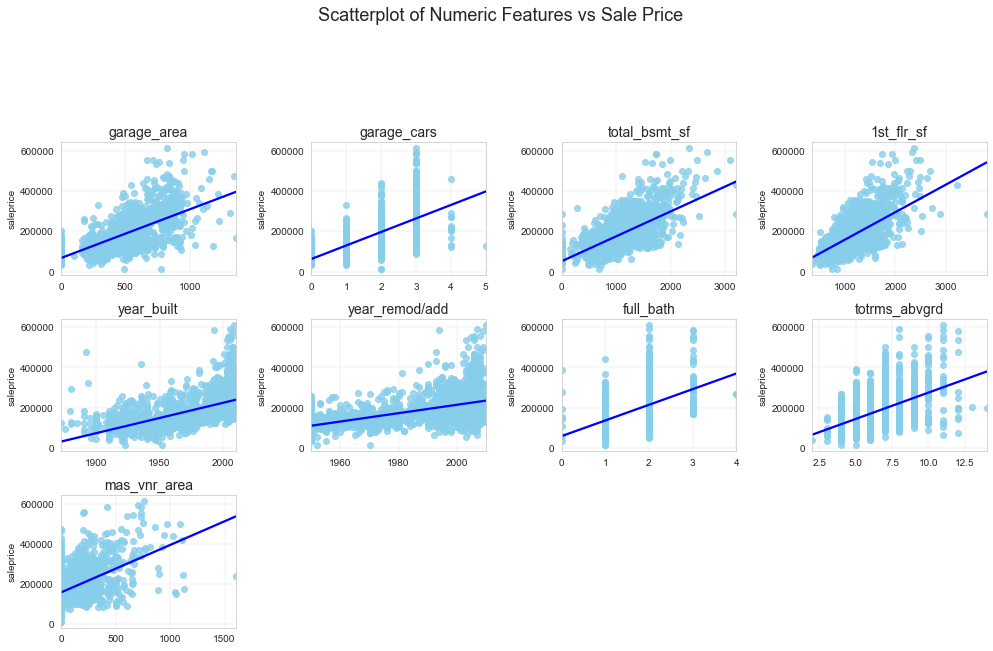

In [308]:
# To visualise the relationship of saleprice vs the features with moderate positively correlated

x_vars = ["garage_area", "garage_cars","total_bsmt_sf", "1st_flr_sf","year_built","year_remod/add","full_bath","totrms_abvgrd","mas_vnr_area"]
eda_scatterplot(train, x_vars, 'saleprice')

From the scatterplot, we can see that all the  variables shows strong positive relationship with the Sale Price.

#### 4d. Relatioships Between Predictor Variables

The heatmap above shows that `garage_cars` have high positive correlation with `garage_area` which is considered reasonable as when the garage area increases, the car capacity increase as well. Another sign that `totrms_abvgrd` highly positive correlated with `gr_liv_area` which also is considered make sense as when living area above groud increases, the rooms above ground to increase also. Also the same explanation for the pair of variables of `1st_flr_sf` and the `total_bsmt_sf`.

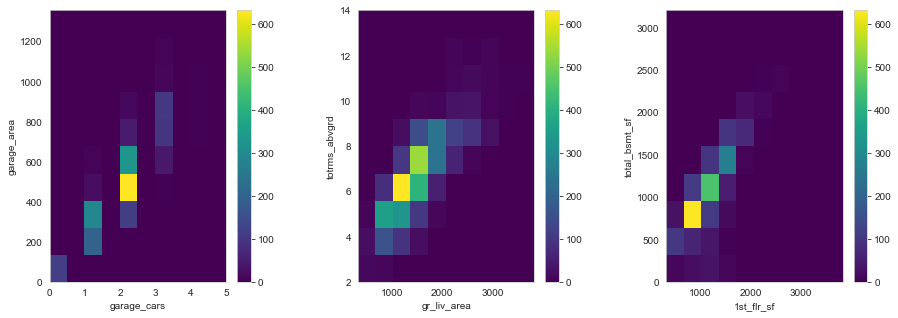

In [309]:
# Let's visualise the relationship of these variables

plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

h1 = axes[0].hist2d(train["garage_cars"],train["garage_area"],cmap="viridis");
axes[0].set(xlabel="garage_cars", ylabel="garage_area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(train["gr_liv_area"],train["totrms_abvgrd"],cmap="viridis");
axes[1].set(xlabel="gr_liv_area", ylabel="totrms_abvgrd")
plt.colorbar(h1[3], ax=axes[1]);
h2 = axes[2].hist2d(train["1st_flr_sf"],train["total_bsmt_sf"],cmap="viridis");
axes[2].set(xlabel="1st_flr_sf", ylabel="total_bsmt_sf")
plt.colorbar(h1[3], ax=axes[2]);

plt.rc("grid", linewidth=0.25)


There is strong correlation between each pair. 
* For Garage Cars and Garage Area, the highest concentration of data is when Garage Cars is 2 and Garage Area is approximately between 450 and 600 ft2. 
* For Gr Liv Area and TotRms AbvGrd, we notice that the highest concentration is when Garage Liv Area is roughly between 800 and 2000 ft2 and TotRms AbvGrd is 6.
* For 1st floor sf and total_bsmt_sf, we notice that the highest concentration is when 1st floor sf is roughly between 800 and 1200 ft2 and total_bsmt_sf is between 500 and 1200 ft2.

The finding from the exploratory data analysis above will be used in the feature engineering section later.

### Output Clean Data

In [310]:
# output to csv

train.to_csv('./datasets/train_clean.csv')
test.to_csv('./datasets/test_clean.csv')